# Some exploratory data analysis

Let us first load the order data:

In [1]:
import matplotlib.pyplot as plt

from pndapetzim.data import read_order_table, LABEL_FILE_NAME, ORDER_FILE_NAME

orders = read_order_table('../data/' + ORDER_FILE_NAME)

What does the data look like?

In [2]:
orders.head()

,index,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,action_mask,order_hour_cos,order_hour_sin
0,0,2548744153,0.152055,19.0,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356,1.0,0.258819,-0.965926
1,1,3804682686,0.457534,20.0,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356,1.0,0.500000,-0.866025
2,2,5162883455,0.997260,19.0,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324,1.0,0.258819,-0.965926
3,3,6482924443,0.968493,17.0,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356,1.0,-0.258819,-0.965926
4,4,6979610790,0.213699,19.0,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356,1.0,0.258819,-0.965926


Are we using optimal data types? I.e. integers for customer ids and floats for timestamps?

In [3]:
orders.dtypes

index                    int64
customer_id              int64
order_date             float64
order_hour             float64
customer_order_rank    float64
is_failed                int64
voucher_amount         float64
delivery_fee           float64
amount_paid            float64
restaurant_id            int64
city_id                  int64
payment_id               int64
platform_id              int64
transmission_id          int64
action_mask            float64
order_hour_cos         float64
order_hour_sin         float64
dtype: object

Let us look into the orders:

In [4]:
orders.amount_paid.median(), orders.amount_paid.describe()

(9.027,
 count    786600.000000
 mean         10.183271
 std           5.618121
 min           0.000000
 25%           6.648120
 50%           9.027000
 75%          12.213000
 max        1131.030000
 Name: amount_paid, dtype: float64)

There are obviously many outliers, so let us take a look at the realistic orders:

(array([ 59035., 402469., 220661.,  68486.,  21594.,   7837.,   3203.,
          1406.,    702.,    427.]),
 array([ 0.     ,  4.99671,  9.99342, 14.99013, 19.98684, 24.98355,
        29.98026, 34.97697, 39.97368, 44.97039, 49.9671 ]),
 <BarContainer object of 10 artists>)

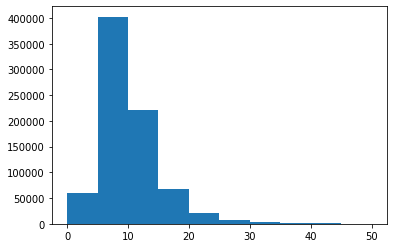

In [5]:
plt.hist(orders.amount_paid[orders.amount_paid < 50])

What about the order time? We **cannot average the hours** themselves because of [this](https://en.wikipedia.org/wiki/Mean_of_circular_quantities), that's why we've calculated the additional fields `order_hours_cos` and `orders_hours_sin`, see [here](https://github.com/gbordyugov/pndapetzim/blob/main/pndapetzim/data.py#L99):

In [6]:
orders.order_hour_cos.describe(), orders.order_hour_sin.describe()

(count    7.866000e+05
 mean     8.967337e-03
 std      5.686224e-01
 min     -1.000000e+00
 25%     -5.000000e-01
 50%     -1.836970e-16
 75%      5.000000e-01
 max      1.000000e+00
 Name: order_hour_cos, dtype: float64,
 count    786600.000000
 mean         -0.748755
 std           0.340521
 min          -1.000000
 25%          -0.965926
 50%          -0.866025
 75%          -0.707107
 max           1.000000
 Name: order_hour_sin, dtype: float64)

Let us find out the most busy order time:

In [7]:
from numpy import arctan2, pi
busy_time = arctan2(orders.order_hour_sin.mean(), orders.order_hour_cos.mean())
busy_time / pi * 24.0

-11.90851198419776

Modulo 24 hours, it's quite close to noon, right? Let's double-check the histograms to be 100% sure:

((array([1.13957e+05, 3.55250e+04, 4.93330e+04, 9.09400e+04, 1.29654e+05,
         8.30000e+01, 1.34092e+05, 1.08876e+05, 6.86660e+04, 5.54740e+04]),
  array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
  <BarContainer object of 10 artists>),
 (array([512082., 102509.,  63726.,  44937.,      0.,  33775.,  21487.,
           5506.,   1682.,    896.]),
  array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
  <BarContainer object of 10 artists>))

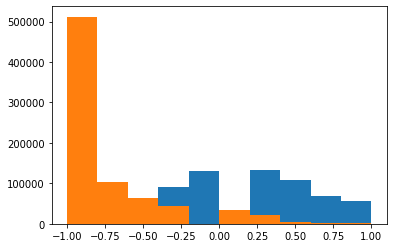

In [8]:
plt.hist(orders.order_hour_cos), plt.hist(orders.order_hour_sin)

Now, what about the distribution of the normalised order dates?

(array([3.00000e+00, 3.00000e+00, 1.10000e+01, 7.00000e+00, 1.10000e+01,
        1.23970e+04, 1.07399e+05, 1.74774e+05, 2.06908e+05, 2.85087e+05]),
 array([-1.39452055, -1.15520548, -0.91589041, -0.67657534, -0.43726027,
        -0.19794521,  0.04136986,  0.28068493,  0.52      ,  0.75931507,
         0.99863014]),
 <BarContainer object of 10 artists>)

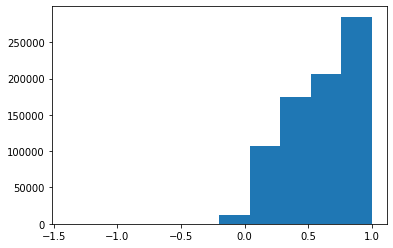

In [9]:
plt.hist(orders.order_date)

We see that the most of the orders are coming between the center of specified time window (between 2015-03-01 and 2017-02-28).